# 히스토그램
- 영상을 구성하는 픽셀들의 빈도수를 측정하여 그래프(히스토그램)으로 표현
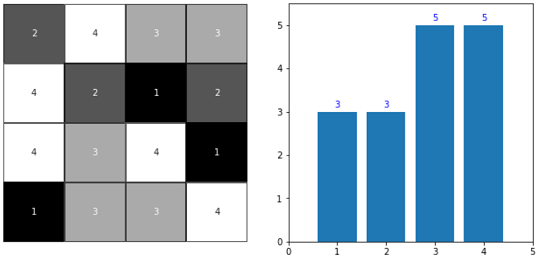

- **cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None)**
    - images: 히스토그램을 구할 입력영상 리스트
    - channels: 히스토그램을 구할 채널 리스트
    - mask: 마스크 영상. 영상전체일 경우 None지정
    - histSize: 히스토그램 각 채널의 bin의 개수 리스트
    - ranges: 히스토그램 각 채널의 최솟값과 최대값 리스트

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
a = cv2.imread('output/lenna_gray.jpg', cv2.IMREAD_GRAYSCALE)
a.shape

(512, 512)

In [10]:
# Lenna 흑백 이미지
# lenna_gray = cv2.imread('output/lenna_gray.jpg')
lenna_gray = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE) #읽어올때 gray scale(흑백)모드로 읽는다.
lenna_gray.shape, 512*512

((512, 512), 262144)

In [9]:
cv2.imshow('frame', lenna_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
hist = cv2.calcHist([lenna_gray], # 히스트그램에 사용할 값을 계산할 대상 이미지. 
                    [0], # 히스토그램을 계산할 채널. 흑백이미지는 0으로 지정
                    None, #mask - 전체 영상의 픽셀들의 빈도수를 구할 경우 None으로 지정.
                    [256], # bin의 개수(몇개로 나눌지). 모든 픽셀값(0-255)별로 빈도수를 계산하기 위해 256으로 지정.
                    [0,256] # 개수를 셀 픽셀값의 범위.
                   )

In [13]:
type(hist), hist.shape

(numpy.ndarray, (256, 1))

In [14]:
hist[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [15]:
hist[100:110]

array([[   0.],
       [1522.],
       [1564.],
       [1605.],
       [   0.],
       [1674.],
       [1604.],
       [1741.],
       [   0.],
       [1774.]], dtype=float32)

In [17]:
np.sum(hist), 512*512

(262144.0, 262144)

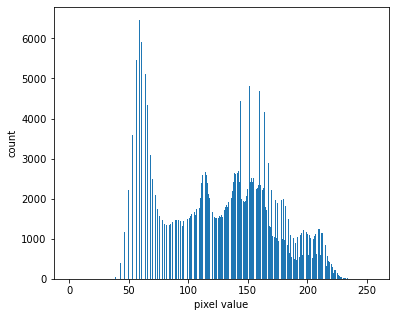

In [27]:
# 히스토그램 
plt.figure(figsize=(6,5))
plt.bar(np.arange(hist.size), hist.flatten().astype(np.int32))
plt.xlabel('pixel value')
plt.ylabel('count')
plt.show()

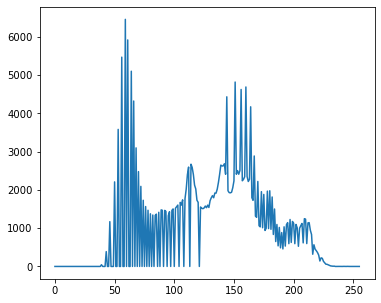

In [28]:
# line plot(선그래프)
plt.figure(figsize=(6,5))
plt.plot(hist)
plt.show()

In [ ]:
# 컬러 이미지의 histogram
# channel별로 히스토그램을 그린다.

In [31]:
lenna = cv2.imread('images/Lenna.png')
lenna.shape

(512, 512, 3)

In [33]:
cv2.imshow('frame',lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
# channel별로 나눈 배열 - [:,:,0], split()
bgr_channels = cv2.split(lenna)
type(bgr_channels), len(bgr_channels), np.shape(bgr_channels)

(list, 3, (3, 512, 512))

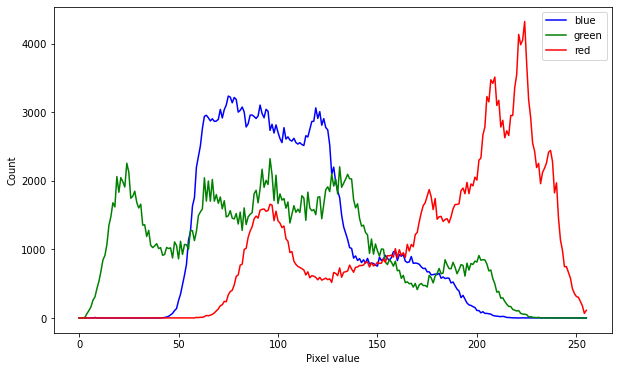

In [43]:
color_label = ['blue', 'green', 'red']

plt.figure(figsize=(10,6))
for channel, color in zip(bgr_channels, color_label):
#     print(channel.shape, color)
    # channel별 hist 계산
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    plt.plot(hist, color=color, label=color)

plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.show()

In [45]:
no_red.shape

(512, 512, 3)

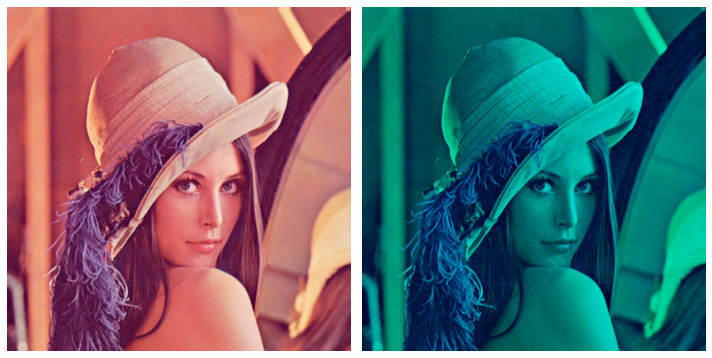

In [47]:
# lenna 이미지에서 red를 제거 -> red 채널의 값을 0으로 변경.
no_red = lenna.copy()
no_red[:,:,2] = 0  #red 채널의 값을 0으로 변경.


plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(lenna[:,:,::-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(no_red[:,:,::-1])
plt.axis('off')

plt.tight_layout()
plt.show()

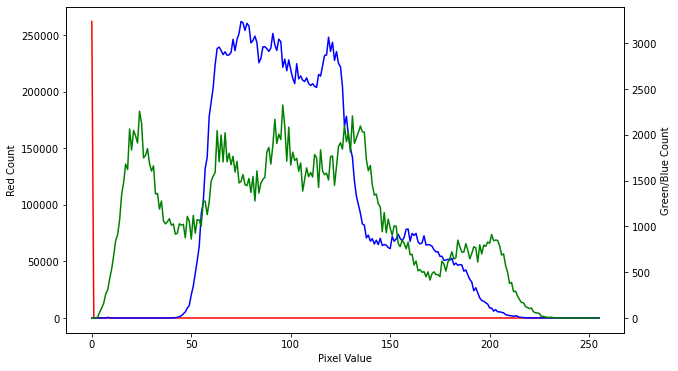

In [50]:
bgr_channels = cv2.split(no_red)
color_label = ['blue', 'green', 'red']

plt.figure(figsize=(10,6))

ax1 = plt.gca() #현재 그래프를 그리는 axes(subplot)을 조회
ax2 = ax1.twinx() #ax1과 동일한 X축을 가지는 axes를 생성


for channel, color in zip(bgr_channels, color_label):
#     print(channel.shape, color)
    # channel별 hist 계산
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    if color == 'red': #ax1
        ax1.plot(hist, color=color)
    else:  #ax2
        ax2.plot(hist, color=color)

ax1.set_xlabel("Pixel Value")
ax1.set_ylabel("Red Count")
ax2.set_ylabel("Green/Blue Count")
plt.show()

# 밝기 조절하기(brightness)
- 영상을 전체적으로 밝게 또는 어둡게 만드는 연산
- 밝기 조절 수식
    - 원본좌표(x,y) + n
    - n이 양수면 각 좌표의 픽셀값이 커지므로 밝아진다.
    - n이 음수이면 각 좌표의 픽셀값이 작아지므로 어두워 진다.
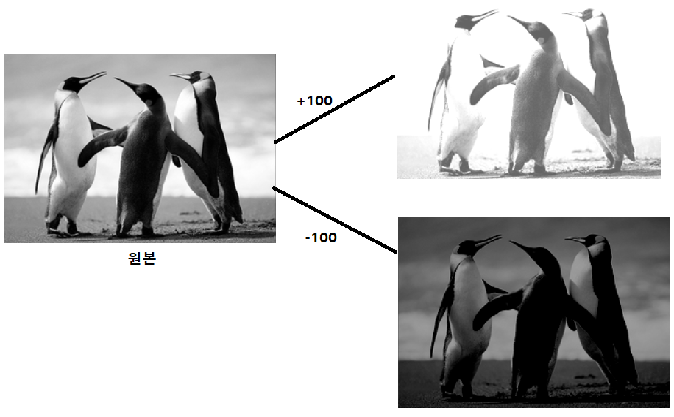
    
- **`cv2.add(src1, src2)`**
    - 밝기 조절이나 두 영상을 합치기에 사용할 수 있다.
    - src1: 첫번째 영상 또는 스칼라
    - src2: 두번째 영상 또는 스칼라
    - src2를 src1에 더한다.
- pixel에 스칼라 값을 더하거나 빼면 0 ~ 255의 범위를 넘어설 수 있다. ndarray의 type은 uint8(unsigned int8) 로 0 ~ 255범위를 넘어가는 숫자는 순환되어 버린다. 
    - 계산결과가 0이하가 되면 255로 부터 작아지게 되고 255가 넘어가면 0으로 가서 커지게 된다.
    - 그래서 cv2.add() 함수는 값이 순환되지 않도록 0이하의 값은 0으로 255이상의 값은 255가 되도록 처리한다. 이것을 **saturate연산**이라고 한다.

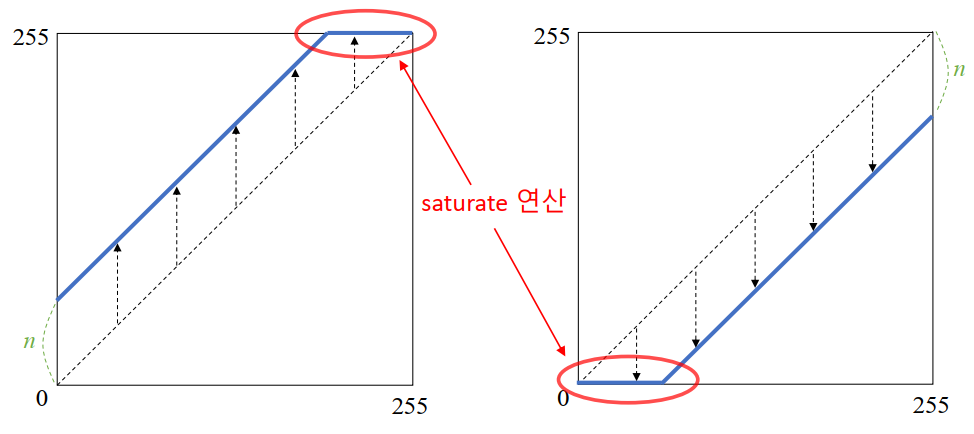

In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [60]:
# 흑백
src = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)
# src 이미지를 밝게 조절 - 양수 더한다.
dest1 = cv2.add(src, 100) #100 픽셀값만큼 밝게
# src 이미지를 어둡게 조절 - 음수 더한다.
dest2 = cv2.add(src, -100)

cv2.imshow('src', src)
cv2.imshow('+100', dest1)
cv2.imshow('-100', dest2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
src_hist = cv2.calcHist([src], [0], None, [256], [0, 256])
dest1_hist = cv2.calcHist([dest1], [0], None, [256], [0, 256])
dest2_hist = cv2.calcHist([dest2], [0], None, [256], [0, 256])

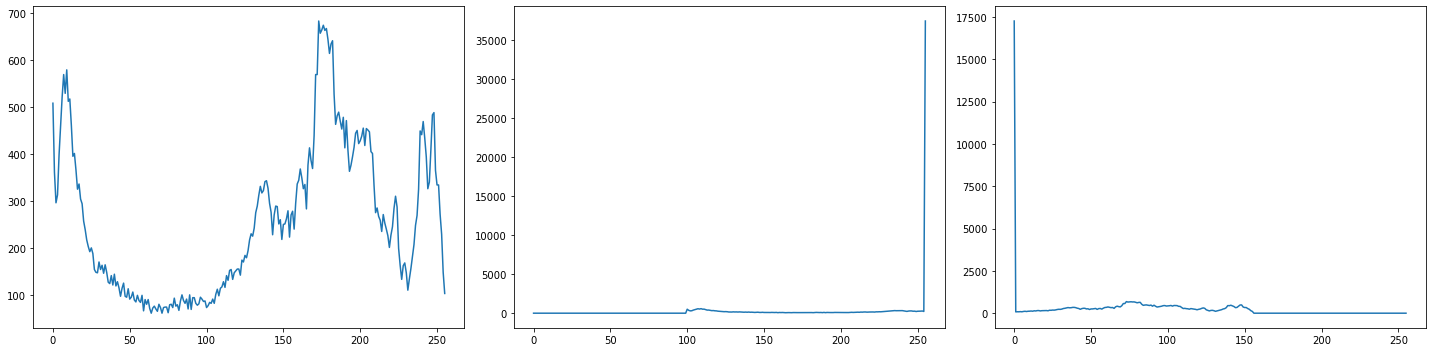

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(src_hist, label='src')

plt.subplot(1,3,2)
plt.plot(dest1_hist, label="+100")

plt.subplot(1,3,3)
plt.plot(dest2_hist, label="-100")

plt.tight_layout()
plt.show()

In [85]:
sample = np.array([0, 255], dtype=np.uint8)

In [86]:
sample+3.0

array([  3., 258.])

In [78]:
sample-3

array([253, 252], dtype=uint8)

In [70]:
sample.dtype

dtype('uint8')

In [81]:
sample2 = np.array([-10, 100, 270])
sample2

array([-10, 100, 270])

In [82]:
np.clip(sample2, 0, 255)  #sample2 배열의 모든 원소들의 값을 0 ~ 255로 수렴

array([  0, 100, 255])

In [83]:
np.clip(sample2, 0, 10)

array([ 0, 10, 10])

In [93]:
# numpy clip을 이용해서 밝기 조절. uint+float => float + float
result1 = np.clip(src+100.0, 0, 255).astype(np.uint8)
type(result1), result1.dtype

(numpy.ndarray, dtype('uint8'))

In [102]:
result2 = np.clip(src-150.0, 0, 255).astype("uint8")
result2.dtype

dtype('uint8')

In [104]:
cv2.imshow('src', src)
cv2.imshow('+100', result1)
cv2.imshow('-150', result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [107]:
# cv2.add(배열1, 배열2) 두개 이미지 합치기
# 배열1과 배열2의 shape은 같아야 한다. shape: 이미지 (height, width, channel)

lenna_gray = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

In [108]:
lenna_gray.shape, src.shape

((512, 512), (222, 296))

In [110]:
# resize
lenna_gray2 = cv2.resize(lenna_gray, [296,222])  # argument: (원본이미지, [width, height])
lenna_gray2.shape

(222, 296)

In [111]:
result = cv2.add(src, lenna_gray2)
cv2.imshow('add', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Color 이미지의 밝기 조절

In [112]:
src = cv2.imread('images/penguin.jpg') #BGR 모드

In [114]:
dest1 = cv2.add(src, (100,100,100,0)) #BGRA 모드 기준으로 채널별로 각각 scalar 을 지정 (같은 값이어도 따로 지정해야 한다.)  A: Alpha (투명도)
dest2 = cv2.add(src, 100) #정수 scalar: (100, 0 , 0, 0) 첫번채널에 100을 더하고 나머지에는 0을 더한다.
dest3 = cv2.add(src, (-100,-100,-100, 0))

In [115]:
cv2.imshow('src', src)
cv2.imshow('dest1', dest1)
cv2.imshow('dest2', dest2)
cv2.imshow('dest3', dest3)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 명암비(Contrast) 조정

## 명암비/대비(Contrast)란
- 밝은 부분과 어두분 부분 사이의 밝기의 정도 차이
    - 영상이 전체적으로 밝은 픽셀들로만 구성되거나 어두운 픽셀들로만 구성되면 명암비가 낮다고 표현한다. 
    - 영상에 밝은 영역과 어두운 역역이 골고루 섞여있으면 명암비가 높다고 표현한다.
- 명암비가 낮으면 객체간의 구분이 되지 않아 흐릿한 느낌이 나고 명암비가 높으면 선명한 느낌이 든다.
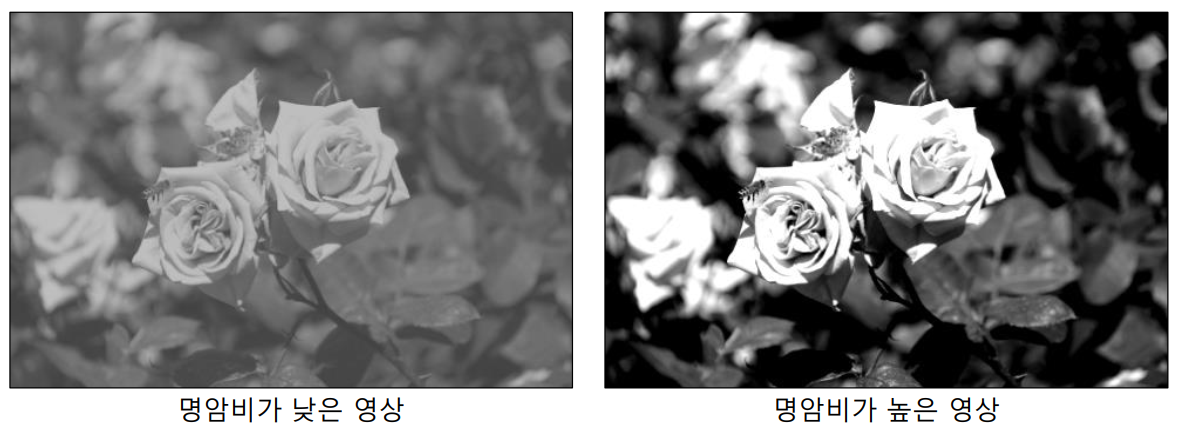

- 명암비를 변환하는 함수공식
$$
g(x, y)=f(x,y)+(f(x,y)-128) \alpha\\
==\\
(1+\alpha)f(x, y)-\alpha 128
$$

- $g$는 결과 image
- $f$는 원본 image
- $x$: x좌표
- $y$: y좌표
- $\alpha$: 대비를 조절하는 값. 
    - 0: 원본과 동일
    - 음수: 명암비를 낮춘다.
    - 양수: 명암비를 높인다.

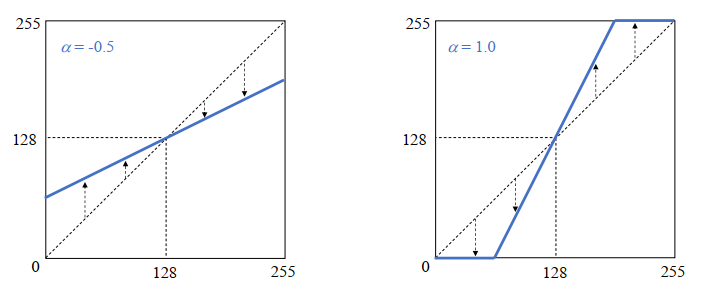

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# 대비(명암비-constrast) 변환 함수 정의
def change_contrast(src_image, alpha=0):
    """
    대비를 변환하는 함수
    [parameter]
        src_image:ndarray - 대비를 변환할 이미지
        alpha: float - 대비를 조절하는 파라미터값. 
               0: 변화없음. 1: 대비를 높인다. , -0.5 대비를 낮춘다.
    """
    return np.clip((1.0+alpha)*src_image - 128.0*alpha, 0, 255).astype('uint8')

In [118]:
sample = np.arange(256) #0 ~ 255
r1 = change_contrast(sample, alpha=1)
r2 = change_contrast(sample, alpha=-0.5)

sample[:5], sample[-5:]

(array([0, 1, 2, 3, 4]), array([251, 252, 253, 254, 255]))

In [119]:
r1[:5], r1[-5:]

(array([0, 0, 0, 0, 0], dtype=uint8),
 array([255, 255, 255, 255, 255], dtype=uint8))

In [120]:
r2[:5], r2[-5:]

(array([64, 64, 65, 65, 66], dtype=uint8),
 array([189, 190, 190, 191, 191], dtype=uint8))

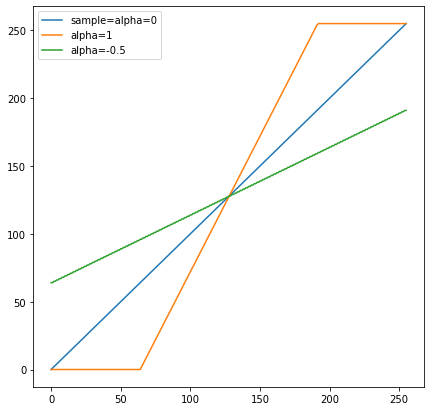

In [122]:
plt.figure(figsize=(7,7))
plt.plot(sample, sample, label='sample=alpha=0')
plt.plot(sample, r1, label='alpha=1')
plt.plot(sample, r2, label='alpha=-0.5')
plt.legend()
plt.show()

In [123]:
# 흑백이미지
lenna_gray = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)
lenna_1 = change_contrast(lenna_gray, alpha=1) #대비를 높임
lenna_5 = change_contrast(lenna_gray, alpha=-0.5) #대비를 낮춤

In [124]:
cv2.imshow('src', lenna_gray)
cv2.imshow('alpha=1', lenna_1)
cv2.imshow('alpha=-0.5', lenna_5)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [125]:
# 컬러이미지
lenna = cv2.imread('images/Lenna.png')
lenna_c1 = change_contrast(lenna, alpha=1)
lenna_c5 = change_contrast(lenna, alpha=-0.5)

In [126]:
cv2.imshow('src', lenna)
cv2.imshow('alpha=1', lenna_c1)
cv2.imshow('alpha=-0.5', lenna_c5)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 채도 (Saturation) 변환
- 채도: 색의 선명도를 말한다.
- 채도를 변환할 때는 HSV color 타입으로 변환한 뒤 S의 값을 바꾼다.
> HSV : 색상(Hue), 채도(Saturation), 명도(Value)

In [127]:
# BGR -> HSV 변환 S값을 변경
import cv2
import numpy as np

lenna = cv2.imread('images/Lenna.png') #BGR

# HSV 변환
lenna_hsv = cv2.cvtColor(lenna, cv2.COLOR_BGR2HSV)
lenna_low_sat = lenna_hsv.copy()
lenna_high_sat = lenna_hsv.copy() #배열복사

In [129]:
lenna_hsv.shape, lenna.shape

((512, 512, 3), (512, 512, 3))

In [140]:
lenna_low_sat[:, :, 1] = np.clip(lenna_low_sat[:, :, 1] - 50.0, 0, 255).astype('uint8') #채도 - 50
lenna_high_sat[:, :, 1] = np.clip(lenna_high_sat[:, :, 1] + 50.0, 0, 255).astype('uint8') #채도 + 50

In [141]:
cv2.imshow('src', lenna)
cv2.imshow('low saturation', cv2.cvtColor(lenna_low_sat, cv2.COLOR_HSV2BGR))  #imshow() BGR 모드로 출력
cv2.imshow('high saturation', cv2.cvtColor(lenna_high_sat, cv2.COLOR_HSV2BGR))

cv2.waitKey(0)
cv2.destroyAllWindows()

# Filter 

## Filtering 개요
- 영상에서 필요한 정보만 통과시키고 필요없는 정보는 걸러내는 작업을 말한다.
- N x N행렬을 영상과 Convolution연산(Correlation연산)을 하여 처리한다.
    - 영상과 연산하는 N x N 행렬을 커널(Kernel), 마스크(Mask), 윈도우(Window)라고 한다.
    - Convolution연산
        - Filter를 영상을 이동하면서 같은 index의 값끼리 곱한뒤 다 더한다. 
        ![conv](figures/conv.gif)        
        
    - 최외곽처리는 바깥에 가상의 픽셀들이 있다고 생각하고 거기에 임의의 값을 채워 계산한다. 
        - 가상의 바깥픽셀을 **Padding**이라고 한다.
        - 바깥픽셀을 채우는 방법
            - BORDER_CONSTANT : 같은 값으로 채운다. 보통 0으로 채움   000|abcd|000
            - BORDER_REPLICATE: 외곽에 있는 값으로 채운다. aaa|abcd|ddd
            - BORDER_REFLECT: 거울에 반사되는 형식으로 채운다. cba|abcd|dcb
            - BORDER_REFLECT_101: (OpenCV 기본방식)BORDER_REFLECT와 같은 형식인데 가장 외곽의 값은 반사시키지 않는다. dcb|abcd|cba
    - N x N 행렬이 어떤 값을 가지고 있느냐에 따라 다양한 영상처리가 가능하다.
        - Bluring: 영상을 부드럽게 만들기
        - Shapening: 영상을 날카롭게 만들기
        - 엣지 검출
        - Noise 제거
    - 다양한 형태의 Kernel이 있으나 보통 3 x 3 행렬을 많이 쓴다.
    
    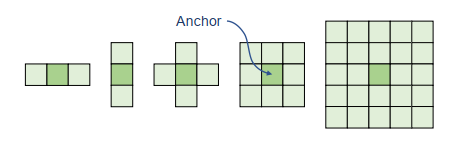
        
        - anchor(고정점): 영상에서 Filtering을 하려는 지점을 가리키는 필터의 중앙점을 사용한다.

## Blurring
- 영상을 흐릿/부드럽게 만드는 작업.
- 픽셀간의 값의 차이를 줄여서 날카로운 엣지가 무뎌지고 영상에 있는 Noise(잡음)이 사라지도록 하는 효과가 있다.
> 엣지(Edge): 물체간의 경계부분으로 contrast(대비)가 크다.

### 평균값 블러링(Average Blur)
- 주변 픽셀의 평균값을 합성곱하여 적용한다.
- 보통 3 x 3이나 5 x 5 필터를 많이 쓰며 필터의 크기가 커질수록 더 흐릿하게 변환된다.
- 영상이 뭉게져 세밀한 부분이 잘 안보이는 단점이 있다.

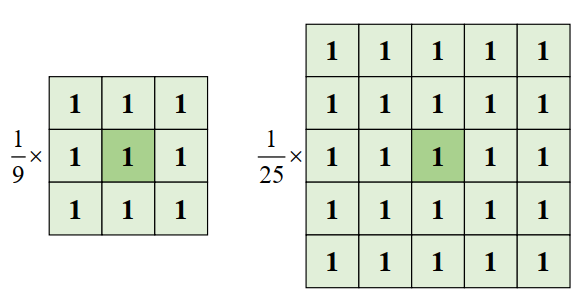
<center>필터 예</center>

- **`cv2.blur(src, ksize)`**
    - src: blur 처리할 입력영상
    - ksize: 필터의 크기. (width, height) 튜플로 지정

### Gaussian Blur

- 대상 픽셀(Anchor)와 가까운 픽셀은 큰 가중치 멀리있는 픽셀은 작은 가중치를 사용해서 평균(가중평균)을 계산해서 필터링 한다.
    - Gaussian 분포(정규분포)의 확률밀도 함수를 사용해 필터에 들어갈 값들을 계산하여 대상픽셀을 기준으로 멀어질 수록 작은 값이 곱해지도록 한다. 
    - 평균은 0으로 하고 표준편차를 조정하여 흐림의 정도를 조절한다. 표준편차 값을 크게할 수록 흐려진다.
    - Filter의 shape은 $(8\sigma + 1,\;8\sigma + 1)$ 나 $(6\sigma + 1,\;6\sigma + 1)$ 으로 정해진다. $\sigma: 표준편차$
- Gaussian Blurring은 blur효과 뿐아니라 노이즈제거에도 많이 사용된다.

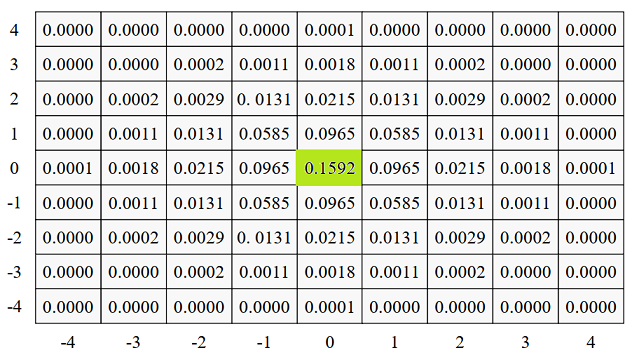

- **`cv2.GaussianBlur(src, ksize, sigmaX, sigmaY)`**
    - src: blur를 적용할 영상. 
    - ksize: 커널크기. (0,0)으로 지정하면 sigma 값에 의해 결정된다. (보통 0,0 으로 설정)
    - sigamX: X축방향 sigma(표준편차) 값
    - sigamY: Y축방향 sigma(표준편차) 값. 생략하면 sigmaX와 같은 값 사용


### 잡음 제거
- `cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)`
    - 양방향 필터로 선명도는 유지하면서 bluring을 이용해 노이즈를 제거한다.
    - src: 잡음을 제거할 입력영상
    - d: 필터의 크기 지정. 음수(-1)을 입력하면 sigmaSpace값에 의해 자동 결정된다. 일반적으로 -1을 설정한다.
    - sigmaColor
        - 엣지인지 아닌지를 판단하는 기준값. 지정한 값보다 크면 엣지라고 생각하고 작으면 엣지가 아니라고 생각해 그 지점을 blurring 한다.
        - 이 값을 너무 크게 주면 엣지가 검출이 안되서 그냥 Gaussian Filter 사용하는 것과 같다.
    - sigmaSpace: Gaussian Filter에서 지정한 표준편차

## 샤프닝(Shappen)
- Blurring의 반대로 흐린영상을 선명한 영상으로 만드는 작업.
- 이미지의 엣지(edge-사물의 윤곽부분)의 대비를 크게 만들어 준다.
    - 이미지 전체를 다 선명하게 하는 게 아니라 윤곽(edge)만 선명하게 만들어 명암비(contrast)를 크게해 선명하게 보이게 한다. 
- Unsharp mask(언샤프 마스크) 필터링
    - Unsharp한 영상을 이용해 Sharp한 영상을 만든다고 해서 Unsharp mask filtering 이라고 한다.
    - 원본 이미지에서 blurring 한 이미지를 뺀다음 그것을 원본이미지에 다시 더한다.
$$
h(x) = f(x)+\alpha(f(x)-\bar{f}(x))\\
f(x): 원본\;이미지\\
\bar{f}(x):\;원본\;이미지를\;blurring한\;이미지\\
\alpha: shappening 정도 조절값
$$

- 제공 함수는 없고 위 공식을 구현한다.